In [1]:
%run base.ipynb

jit after {'jit': True, 'jit_options': {'flags': '-Ofast'}, 'compiler': 'shell'}
number of joints = 4


In [2]:
i_X_p, i_X_0s = rig_dyn.forward_kinematics(floating_base = True)

In [3]:
H0 , R0, p0 = pluck.spatial_to_homogeneous(i_X_0s[0])
T0 = cs.vertcat(p0, quatT.rotation_matrix_to_quaternion(R0, order='wxyz'))
T0_euler = cs.vertcat(p0, pluck.rotation_matrix_to_euler(R0, order='xyz'))
dIFF_KinJ0 = cs.jacobian(T0_euler, cs.vertcat(arm_ss.n))
dIFF2_KinJ0 = cs.jacobian(dIFF_KinJ0, cs.vertcat(arm_ss.n))
dot_J0 = (dIFF2_KinJ0@arm_ss.dn).reshape((6, 10))

H1 , R1, p1 = pluck.spatial_to_homogeneous(i_X_0s[1])
T1 = cs.vertcat(p1, quatT.rotation_matrix_to_quaternion(R1, order='wxyz'))
T1_euler = cs.vertcat(p1, pluck.rotation_matrix_to_euler(R1, order='xyz'))
dIFF_KinJ1 = cs.jacobian(T1_euler, cs.vertcat(arm_ss.n))
dIFF2_KinJ1 = cs.jacobian(dIFF_KinJ1, cs.vertcat(arm_ss.n))
dot_J1 = (dIFF2_KinJ1@arm_ss.dn).reshape((6, 10))

H2 , R2, p2 = pluck.spatial_to_homogeneous(i_X_0s[2])
T2 = cs.vertcat(p2, quatT.rotation_matrix_to_quaternion(R2, order='wxyz'))
T2_euler = cs.vertcat(p2, pluck.rotation_matrix_to_euler(R2, order='xyz'))
dIFF_KinJ2 = cs.jacobian(T2_euler, cs.vertcat(arm_ss.n))
dIFF2_KinJ2 = cs.jacobian(dIFF_KinJ2, cs.vertcat(arm_ss.n))
dot_J2 = (dIFF2_KinJ2@arm_ss.dn).reshape((6, 10))

H3 , R3, p3 = pluck.spatial_to_homogeneous(i_X_0s[3])
T3 = cs.vertcat(p3, quatT.rotation_matrix_to_quaternion(R3, order='wxyz'))
T3_euler = cs.vertcat(p3, pluck.rotation_matrix_to_euler(R3, order='xyz'))
dIFF_KinJ3 = cs.jacobian(T3_euler, cs.vertcat(arm_ss.n))
dIFF2_KinJ3 = cs.jacobian(dIFF_KinJ3, cs.vertcat(arm_ss.n))
dot_J3 = (dIFF2_KinJ3@arm_ss.dn).reshape((6, 10))

H4 , R4, p4 = pluck.spatial_to_homogeneous(i_X_0s[4])
T4 = cs.vertcat(p4, quatT.rotation_matrix_to_quaternion(R4, order='wxyz'))
T4_euler = cs.vertcat(p4, pluck.rotation_matrix_to_euler(R4, order='xyz'))
dIFF_KinJ4 = cs.jacobian(T4_euler, cs.vertcat(arm_ss.n))
dIFF2_KinJ4 = cs.jacobian(dIFF_KinJ4, cs.vertcat(arm_ss.n))
dot_J4 = (dIFF2_KinJ4@arm_ss.dn).reshape((6, 10))


fk_eval = cs.Function("fkeval", [arm_ss.n, arm_ss.base_T], [T0, T1, T2, T3, T4])
fk_eval_euler = cs.Function("fkeval_euler", [arm_ss.n, arm_ss.base_T], [T0_euler, T1_euler, T2_euler, T3_euler, T4_euler])
dIFF_KinJ = cs.Function("dIFF_KinJ", [arm_ss.n, arm_ss.base_T], [dIFF_KinJ0, dIFF_KinJ1, dIFF_KinJ2, dIFF_KinJ3, dIFF_KinJ4])
dIFF2_KinJ = cs.Function("dIFF2_KinJ", [arm_ss.n, arm_ss.base_T], [dIFF2_KinJ0, dIFF2_KinJ1, dIFF2_KinJ2, dIFF2_KinJ3, dIFF2_KinJ4])
# fk_eval.save("fk_eval.casadi")

In [4]:
# forward kinematics wrt to NED origin quaternion
T_i = fk_eval([0.2,1,0.5, 0,0,0 , cs.pi, cs.pi, cs.pi, cs.pi],alpha.base_T0)
T_i

(DM([0.39, 1.00001, 0.366, 1.24714e-20, -6.12323e-17, 1, 0.000203673]),
 DM([0.41, 1.00002, 0.333, 1, 0.000203673, -6.12448e-17, 6.12199e-17]),
 DM([0.37, 1.00008, 0.1877, -0.000203673, 1, -1.32679e-06, -2.70233e-10]),
 DM([0.39, 1.00009, 0.1547, -0.000176386, 0.866025, 0.500001, 0.000101837]),
 DM([0.39, 1.00013, 0.05495, -0.000176386, 0.866025, 0.500001, 0.000101837]))

In [5]:
# # c , cpp or matlab code generation for forward dynamics
# fk_eval.generate("fk_eval_.c")
# os.system(f"gcc -fPIC -shared fk_eval_.c -o libFK.so")

In [6]:
# fk_eval_euler = cs.Function("fkeval_euler", [arm_ss.n, arm_ss.base_T], [T4_euler])
# # fk_eval_euler.save("fk_eval.casadi")
# dIFF_KinJ = cs.Function("dIFF_KinJ", [arm_ss.n, arm_ss.base_T], [dIFF_KinJ4])
# dot_J = cs.Function("dot_J", [arm_ss.n, arm_ss.dn, arm_ss.base_T], [dot_J4])

# # dIFF_KinJ.save("dIFF_KinJ.casadi")
# # dot_J.save("dot_J.casadi")

In [7]:
# # forward kinematics wrt to NED origin euler
# T_i = fk_eval_euler([0.2,1,0.5, 0,0,0 , cs.pi, cs.pi, cs.pi, cs.pi],alpha.base_T0)
# T_i

In [8]:
# dKJ = dIFF_KinJ([0.2,1,0.5, 0,0,0 , cs.pi, cs.pi, cs.pi, cs.pi],alpha.base_T0)
# dKJ

<h1>Workspace Box</h1>

In [ ]:
min_pos_fb, max_pos_fb, positions_fb = rig_dyn.approximate_workspace(list(zip(alpha.joint_min, alpha.joint_max)), alpha.base_T0, floating_base=True, num_samples=5000000)
min_pos_fx, max_pos_fx, positions_fx = rig_dyn.approximate_workspace(list(zip(alpha.joint_min, alpha.joint_max)), alpha.base_T0, floating_base=False, num_samples=5000000)
# np.save("workspace.npy", positions_fb)

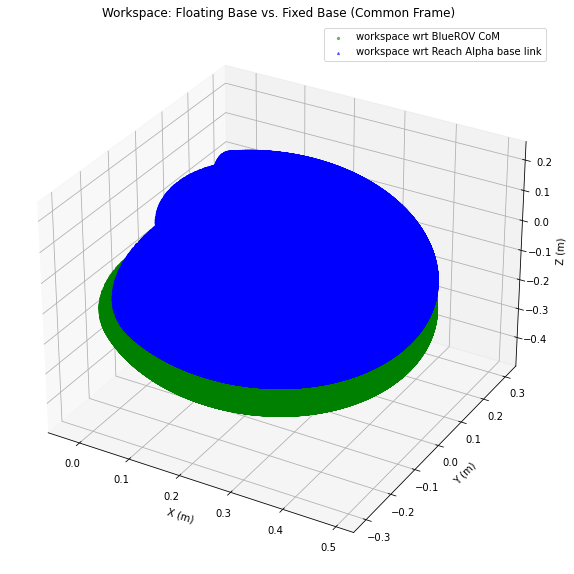

In [10]:
def transform_positions(positions, base_T0):
    """
    positions: (N x 3) array of points (the fixed-base workspace).
    base_T0:   [r, p, y, x, y, z] – we only use the last 3 for translation.
    
    Returns: (N x 3) array, with [x, y, z] offset applied.
    """
    tx, ty, tz = base_T0[3], base_T0[4], base_T0[5]
    return positions + np.array([tx, ty, tz])

def plot_floating_vs_fixed(
    # Floating-base data (wrt BlueROV CoM)
    positions_fb, min_pos_fb, max_pos_fb,
    # Fixed-base data (wrt Reach Alpha base link)
    positions_fx, min_pos_fx, max_pos_fx,
    # base_T0: [r, p, y, x, y, z], used for translation offset
    base_T0
):
    """
    Plots both floating-base and fixed-base workspaces in the same frame,
    with distinct colors for better visual separation.

    - The floating-base data is presumed to be wrt the BlueROV center of mass (CoM).
    - The fixed-base data is presumed to be wrt the Reach Alpha base link.
    - We shift the fixed-base points by [x, y, z] from base_T0 so that both sets
      appear in the same coordinate frame.
    """
    # 1) Shift fixed-base points so their origin aligns with the floating-base reference
    positions_fx_offset = transform_positions(positions_fx, base_T0)

    # (Optional) also shift min/max if you need to combine bounding boxes, etc.
    # tx, ty, tz = base_T0[3], base_T0[4], base_T0[5]
    # min_pos_fx_offset = min_pos_fx + np.array([tx, ty, tz])
    # max_pos_fx_offset = max_pos_fx + np.array([tx, ty, tz])

    # 2) Plot
    fig = plt.figure(figsize=(12, 10))  # Make the figure larger
    ax = fig.add_subplot(projection='3d')

    # Floating-base workspace: wrt BlueROV CoM
    ax.scatter(
        positions_fb[:, 0], positions_fb[:, 1], positions_fb[:, 2],
        c='green', marker='o', s=5, alpha=0.5,
        label='workspace wrt BlueROV CoM'
    )

    # Fixed-base workspace: wrt Reach Alpha base link (shifted)
    ax.scatter(
        positions_fx_offset[:, 0], positions_fx_offset[:, 1], positions_fx_offset[:, 2],
        c='blue', marker='^', s=5, alpha=0.5,
        label='workspace wrt Reach Alpha base link'
    )

    ax.set_title("Workspace: Floating Base vs. Fixed Base (Common Frame)")
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")
    ax.set_zlabel("Z (m)")
    ax.legend()
    plt.show()

plot_floating_vs_fixed(positions_fb, min_pos_fb, max_pos_fb,
                       positions_fx, min_pos_fx, max_pos_fx,
                       alpha.base_T0)

In [11]:
# wrt bluerov center of mass
list(zip(min_pos_fb, max_pos_fb))

[(-0.02598275503434804, 0.4949357648992938),
 (-0.3049134112288331, 0.3049572970164234),
 (-0.4519606795898301, 0.11215354192594956)]

In [12]:
# wrt reach alpha base link
list(zip(min_pos_fx, max_pos_fx))

[(-0.21588075508018606, 0.3049528533082897),
 (-0.30493959560879, 0.3049433688492489),
 (-0.23213754733213132, 0.33195342076896056)]